# Calculate and Plot Phasor Plots

## Set data path

In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import napari
from PhasorPy import phasor, phasor_plot, rgb_coloring, phasor_circle, histogram_filtering
from readPTU_FLIM import PTUreader
from matplotlib import colors

In [2]:
data_path = "C:/Users/mazo260d/Desktop/Conni_BiA_PoL/copied_for_Marcelo/single_image/raw_FLIM_data/single_FLIM_image.ptu"
# data_path = "C:/Users/cblei/Desktop/miniSabb_local/FLIM_file_formats/single_FLIM_image.ptu"

In [3]:
data_path = Path(data_path)
print(data_path)

C:\Users\mazo260d\Desktop\Conni_BiA_PoL\copied_for_Marcelo\single_image\raw_FLIM_data\single_FLIM_image.ptu


## Open ptu file

In [4]:
ptu_file = PTUreader(data_path, print_header_data = False)

TCSPC Hardware: PicoHarpT3
Raw Data has been Read!



## Get FLIM data

In [5]:
flim_data_stack, intensity_image = ptu_file.get_flim_data_stack()

## Format data

Re-arange axes to have (x,y) by the end

In [6]:
flim_data_stack_for_napari = np.moveaxis(flim_data_stack, [0, 1], [-2, -1])

Get only first channel (the second channel for this image is empty)

In [7]:
flim_data_stack_for_napari = flim_data_stack_for_napari[0, :, :, :]

In [8]:
flim_data_stack_for_napari.shape

(270, 512, 512)

## FFT

In [9]:
flim_data_fft = np.fft.fft(flim_data_stack_for_napari, axis=0)

In [10]:
ic = 0

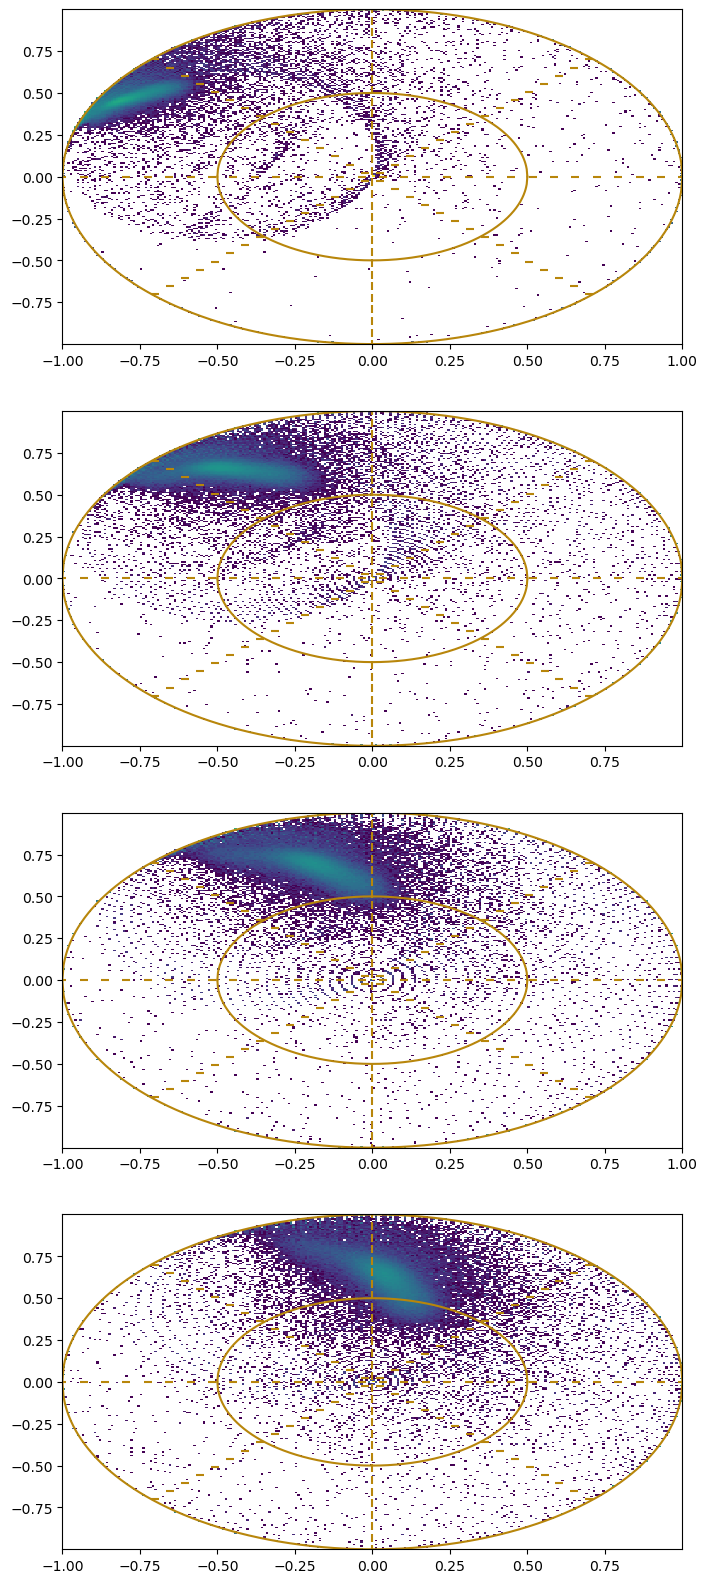

In [14]:
n_harmonics = 4
fig, ax = plt.subplots(n_harmonics, 1, figsize=(8, n_harmonics*5))
for i in range(n_harmonics):
    g, s, md, ph, dc = phasor(flim_data_stack_for_napari, harmonic = i+1)
    x, y = histogram_filtering(dc, g, s, ic)
    x = np.ravel(g)
    y = np.ravel(s)
    ax[i].hist2d(x, y, bins=256, norm=colors.LogNorm())
    phasor_circle(ax[i])
    
    #, range = [[-1, 1], [-1, 1]])
    # ax[i].hist2d(x, y, bins=256, cmap="RdYlGn_r", norm=colors.LogNorm(), range=[[-1, 1], [-1, 1]])

    # # ax[i].scatter(x,y,marker='.', s=4)
    # ax[i].hist2d(x, y, bins=256)
    

In [12]:
# fig, ax = plt.subplots()
# x, y = histogram_filtering(dc, g, s, ic)
# ax.hist2d(x, y, bins=256, cmap="RdYlGn_r", norm=colors.LogNorm(), range=[[-1, 1], [-1, 1]])
# ax.set_title('Phasor')
# phasor_circle(ax)